In [13]:
import csv
from os import listdir
from os.path import isfile, isdir, join,abspath
import os
import pandas as pd
import numpy as np
from numpy.testing import assert_almost_equal
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
mypath = "EMGdata/1205more"# 指定要列出所有檔案的目錄
patient='lin1205more'      #病人名稱，後面可加日期加以區分
folder=patient+'/'+patient #要存放輸出結果的資料夾+病人
le = [840,1080,990,1070,1030,680] #病人在不同時段的levodopa值
U =  []                    #病人在不同時段的UPDRS值
levodopa_on=True         #有無需要計算包含levodopa的相關矩陣
UPDRS_on=False             #有無需要計算包含UPDRS的相關矩陣
testname='teat'            #檔案名稱裡包含數字編號前的字串
testorder=1                #在檔案名稱中的幾個順序裡有檔案數字

# EMG資料存檔位置

In [15]:
dir=(patient)  #EMG檔案的存放位置
if not os.path.exists(dir):
         os.mkdir(dir)

# 取得EMG資料裡１６個頻道的指標的函式

In [16]:
def getburst(data):
    burstduration=[]
    burstinterval=[]
    df=data.get('Ku')
    for num in range(16):
        bd=0
        bi=0
        val1=0
        val2=0
        for i in range(len(df)):
            n=str(num+1)
            if(df['Off_'+n][i]!=0):
                val1+=1
                bd+=df['Off_'+n][i]-df['On_'+n][i]   
            if((df['Off_'+n][i]!=0)and(i!=0)):
                bi+=df['On_'+n][i]-df['Off_'+n][i-1] 
                val2+=1
        if(val1==0):
            burstduration.append(0)
        else:
            burstduration.append(bd/val1) 
        if(val2==0):
            burstinterval.append(0)
        else:
            burstinterval.append(bi/val2)
    return burstduration,burstinterval

In [17]:
def get_ku(data):
    Ku=[]
    df1=data.get('Ku')   
    for num in range(16):
        ku=0
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['Ku_'+n][i]!=0):
                val+=1
                ku+=df1['Ku_'+n][i]
        if(val==0):
            Ku.append(0)
        else:
            Ku.append(ku/val)
    return(Ku)

In [18]:
def get_corr(data):
    CorrDim=[]
    df1=data.get('CD')
    for num in range(16):
        cd=0
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['CD_'+n][i]!=0):
                val+=1
                cd+=df1['CD_'+n][i]
        if(val==0):
            CorrDim.append(0)
        else:
            CorrDim.append(cd/val)
    return(CorrDim)

In [19]:
def get_PSD_3_to_7(data):
    PSD_3_to_7=[]
    df1=data.get('PSD_3_to_7')
    for num in range(16):
        psd=0
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['PSD_'+n][i]!=0):
                val+=1
                psd+=df1['PSD_'+n][i]

        PSD_3_to_7.append(psd/val)
    return(PSD_3_to_7)

In [20]:
def get_PSD_12_to_30(data):
    PSD_12_to_30=[]
    df1=data.get('PSD_12_to_30')  
    for num in range(16):
        psd=0
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['PSD_'+n][i]!=0):
                val+=1
                psd+=df1['PSD_'+n][i]

        PSD_12_to_30.append(psd/val)
    return(PSD_12_to_30)

In [21]:
def get_PSD_20_to_40(data):
    PSD_20_to_40=[]
    df1=data.get('PSD_20_to_40')   
    for num in range(16):
        psd=0
        val=0
        for i in range(len(df1)):
            n=str(num+1)
            if(df1['PSD_'+n][i]!=0):
                val+=1
                psd+=df1['PSD_'+n][i]

        PSD_20_to_40.append(psd/val)
    return(PSD_20_to_40)

In [22]:
def getsepData(fullpath):
    for i in range(len(test)):
        if((testname+str(test[i])) in fullpath.split("_")[testorder]):
            if(levodopa_on&UPDRS_on):
                UPDRS=U[i]   
                levodopa=le[i]  
            elif(levodopa_on&(not UPDRS_on)): 
                levodopa=le[i] 
            elif((not levodopa_on)&UPDRS_on): 
                UPDRS=U[i]  
    SepData=[]
    df = pd.DataFrame()
    data = pd.read_excel(fullpath, sheet_name=None)
    sheet = pd.ExcelFile(fullpath)
    burstinterval,burstduration=getburst(data)
    CorrDim=get_corr(data)
    PSD_3_to_7=get_PSD_3_to_7(data)
    PSD_12_to_30=get_PSD_12_to_30(data)
    PSD_20_to_40=get_PSD_20_to_40(data)
    ku=get_ku(data)
    Data= pd.DataFrame({'test': [fullpath.split("_")[testorder]]})
    for i in range(16):
        rows=[]
        n=str(i+1)
        if(levodopa_on&UPDRS_on):
            rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]],'levodopa_'+n:levodopa,'UPDRS_'+n:UPDRS}
        elif(levodopa_on&(not UPDRS_on)):    
            rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]],'levodopa_'+n:levodopa}
        else:
            rows={'burstduration_'+n: [burstduration[i]],'burstinterval_'+n: [burstinterval[i]],'Ku_'+n: [ku[i]],'CorrDim_'+n: [CorrDim[i]] ,'PSD_3_to_7_'+n: [PSD_12_to_30[i]],'PSD_12_to_30_'+n: [PSD_3_to_7[i]], 'PSD_20_to_40_'+n:[PSD_20_to_40[i]]}
        rows=pd.DataFrame.from_dict(rows)
        SepData.append(rows)
    return SepData

In [23]:
def correlation_matrix(mypath,part,test,ch):
    D=[]
    for filename in listdir(mypath): 
        fullpath = join(mypath,filename)
        #
        name=fullpath.split("_")[testorder]
        for i in test:  
            # 
            if (testname+str(i) in name):
                D.append(getsepData(fullpath))  
    #計算不同頻道的相關矩陣
    for i in ch:
        Data= pd.DataFrame()
        for j in range(len(D)):
            Data=pd.concat([Data, D[j][i-1]], axis=0)
        corr_matrix = Data.corr()
        corr_matrix.to_csv(folder+'_'+part+'_'+str(i)+'.csv')
        plt.figure(figsize = (10,8))
        swarm_plot=sns.heatmap(corr_matrix,linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)
        plt.title(patient+'_'+part+'_'+str(i+1), fontsize =20)
        fig = swarm_plot.get_figure()
        fig.tight_layout()
        fig.savefig(folder+'_'+part+'_'+str(i)+'.png',bbox_inches='tight',pad_inches=0.25,facecolor='w') 
        plt.figure().clear()
    
    

# 做相關矩陣

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


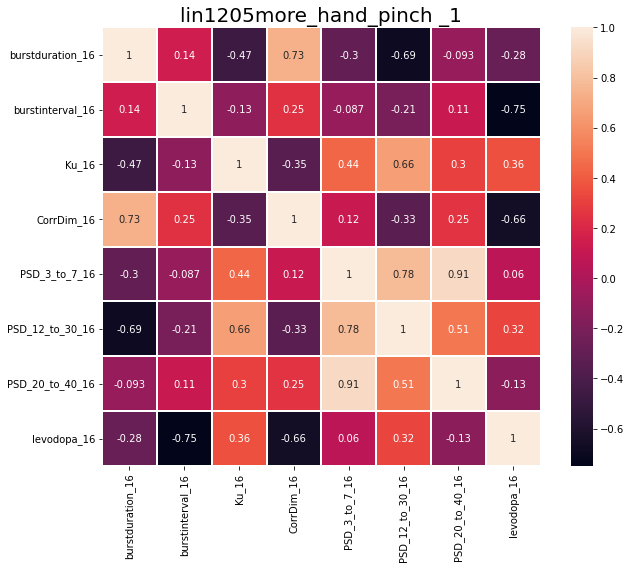

<Figure size 432x288 with 0 Axes>

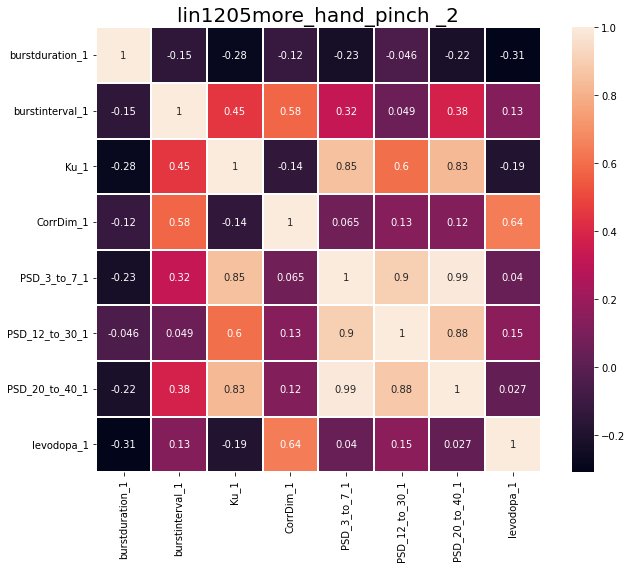

<Figure size 432x288 with 0 Axes>

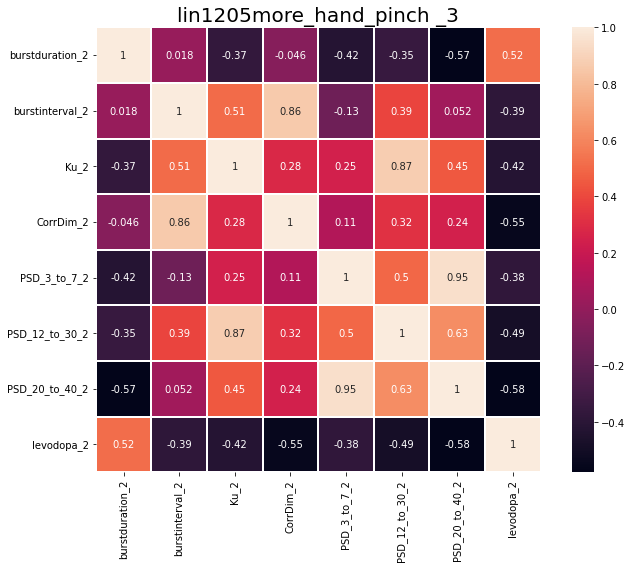

<Figure size 432x288 with 0 Axes>

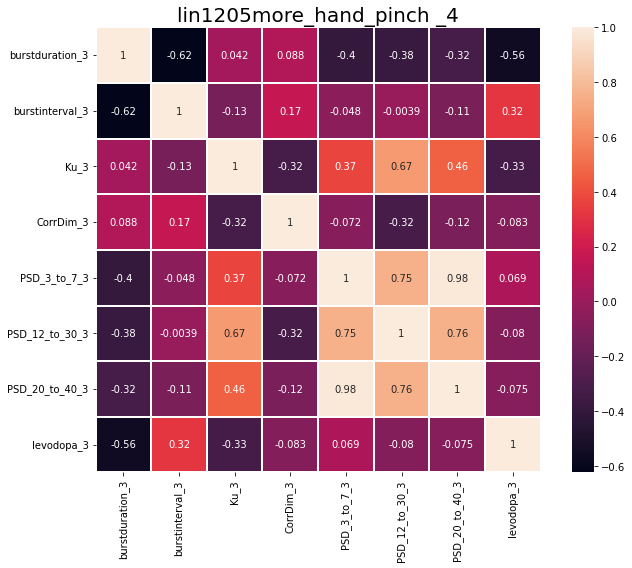

<Figure size 432x288 with 0 Axes>

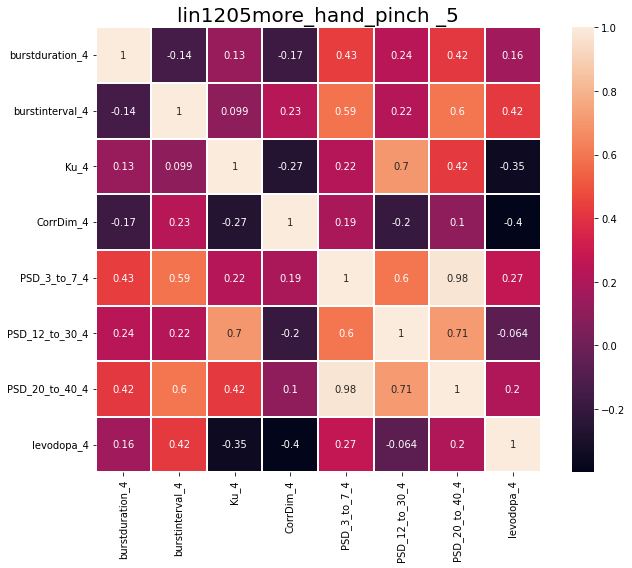

<Figure size 432x288 with 0 Axes>

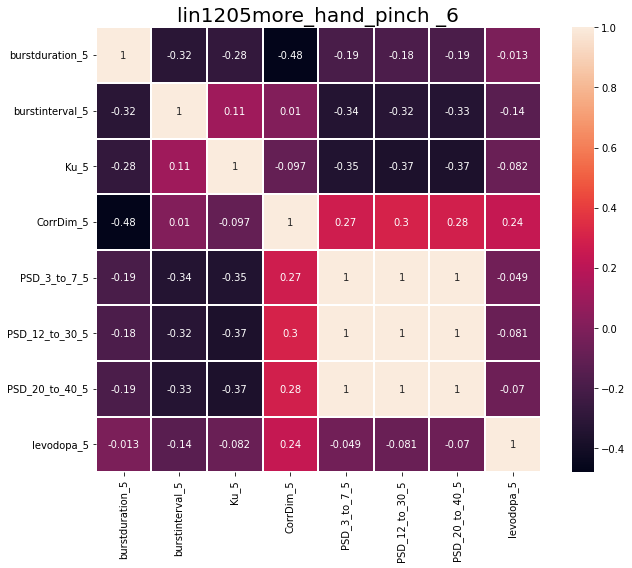

<Figure size 432x288 with 0 Axes>

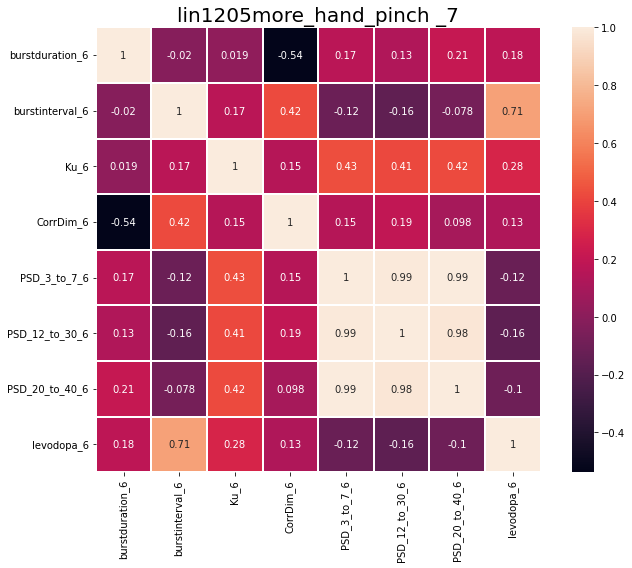

<Figure size 432x288 with 0 Axes>

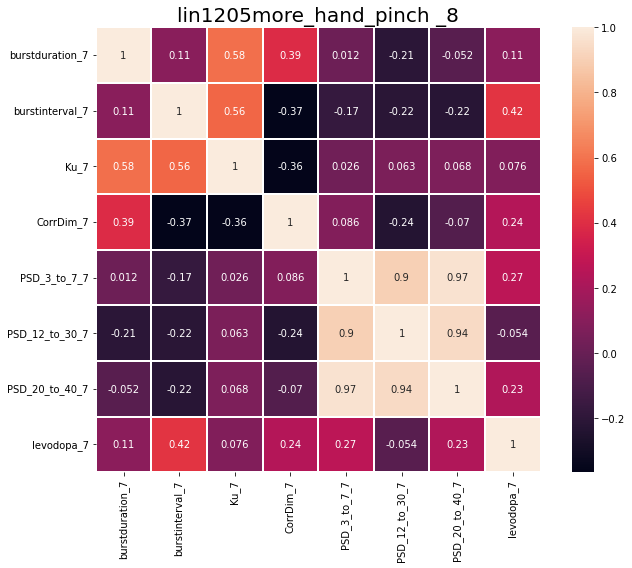

<Figure size 432x288 with 0 Axes>

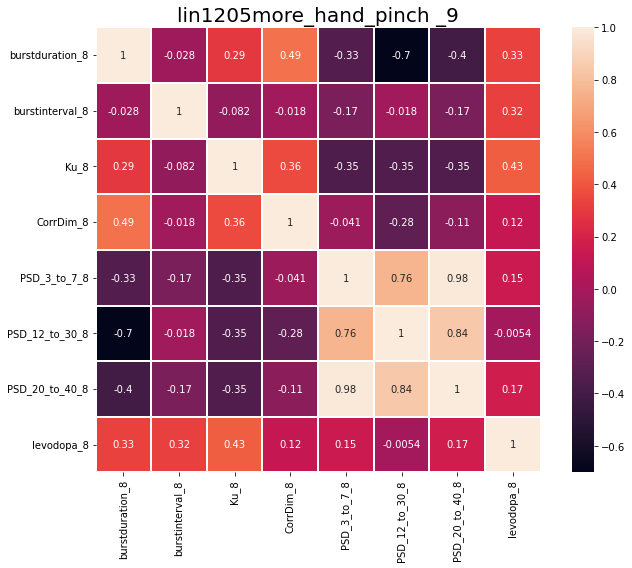

<Figure size 432x288 with 0 Axes>

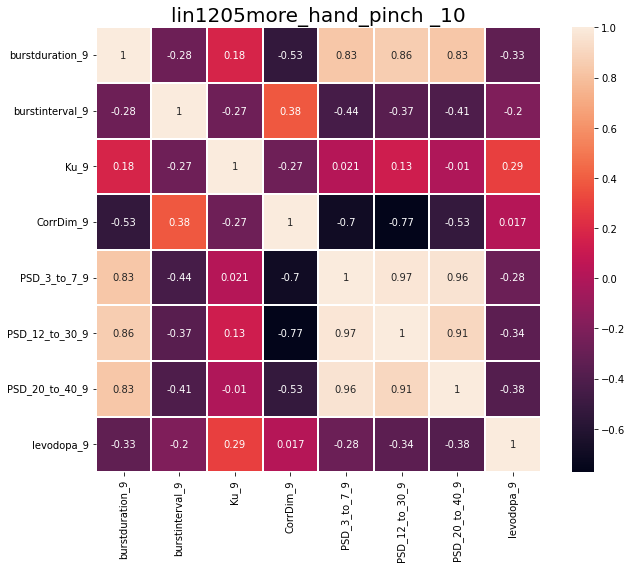

<Figure size 432x288 with 0 Axes>

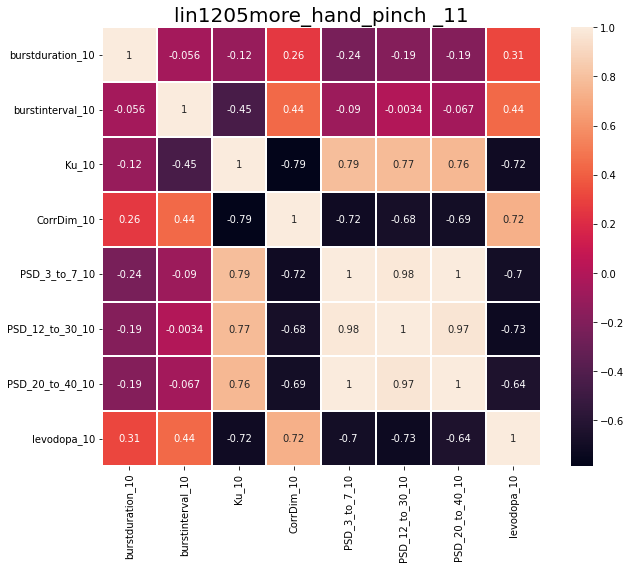

<Figure size 432x288 with 0 Axes>

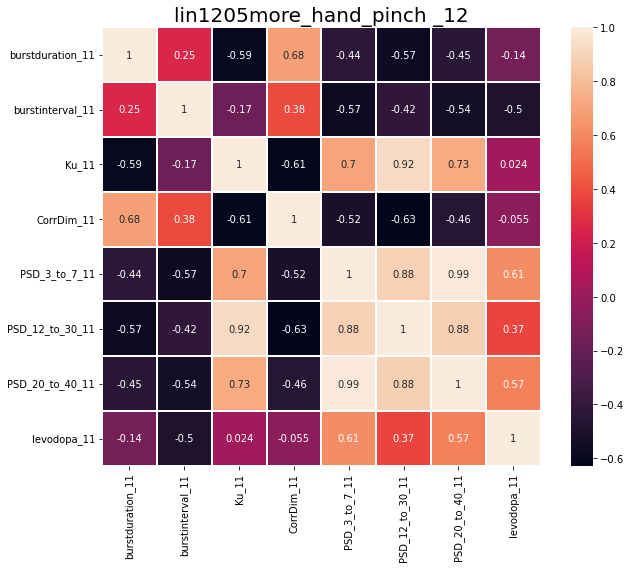

<Figure size 432x288 with 0 Axes>

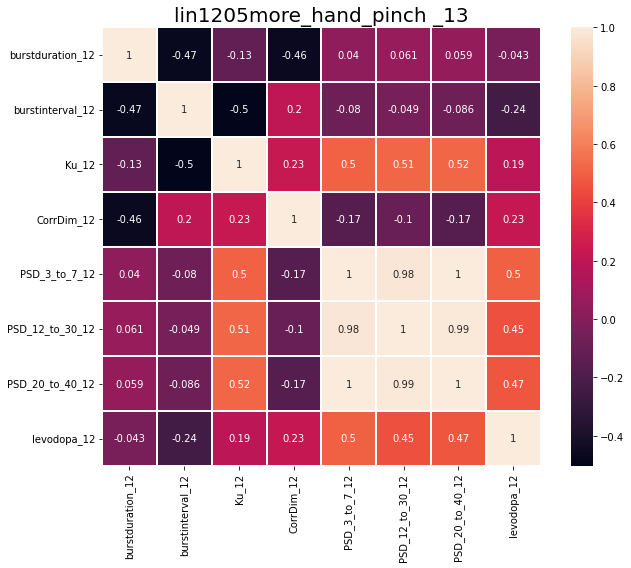

<Figure size 432x288 with 0 Axes>

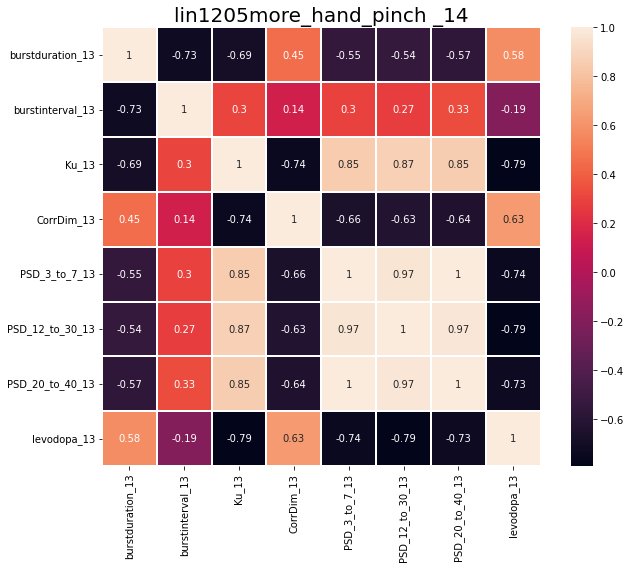

<Figure size 432x288 with 0 Axes>

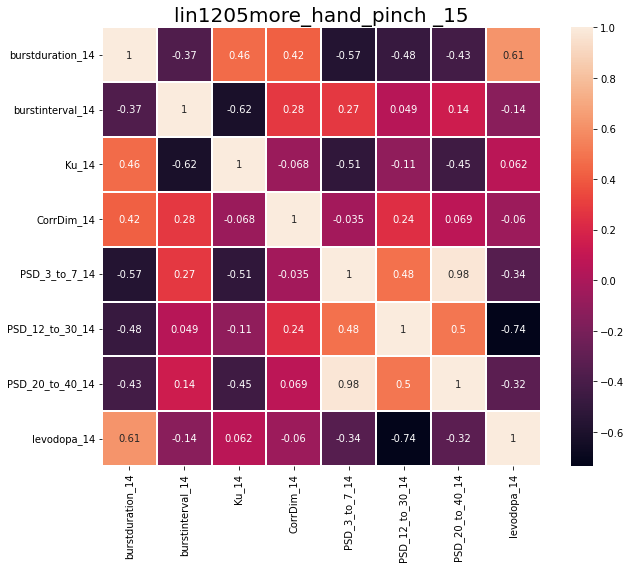

<Figure size 432x288 with 0 Axes>

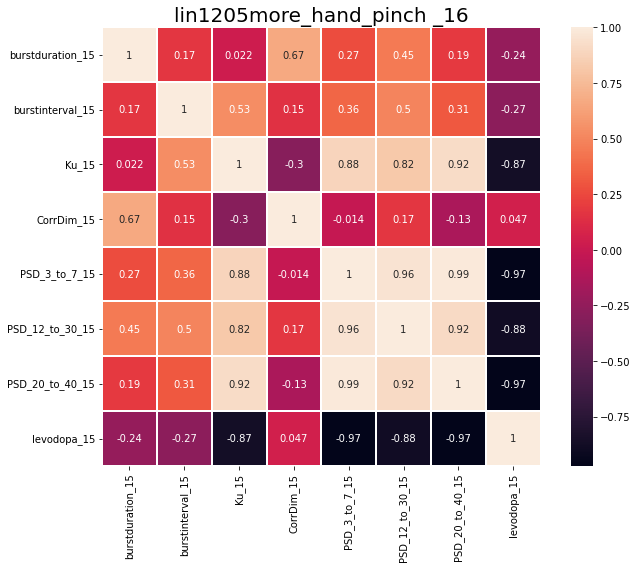

<Figure size 432x288 with 0 Axes>

In [24]:
#選取要做相關矩陣的頻道
ch=range(16)
#部位的名稱
part='hand_pinch '
#檔案的數字
test=[10,33,47,65,87,101]

correlation_matrix(mypath,part,test,ch)

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


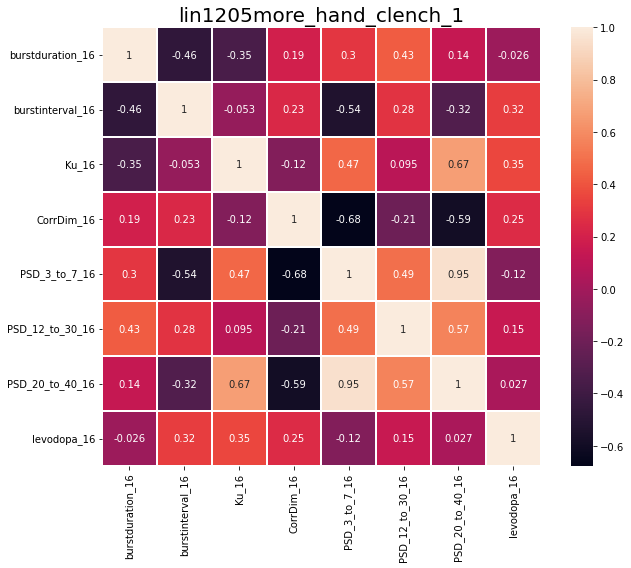

<Figure size 432x288 with 0 Axes>

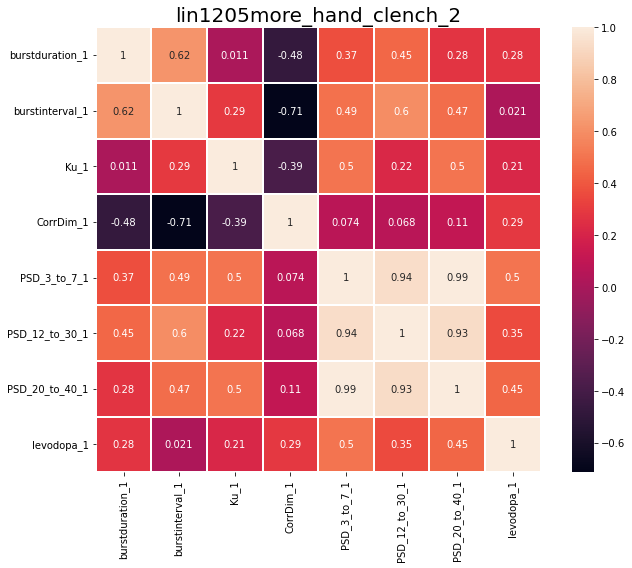

<Figure size 432x288 with 0 Axes>

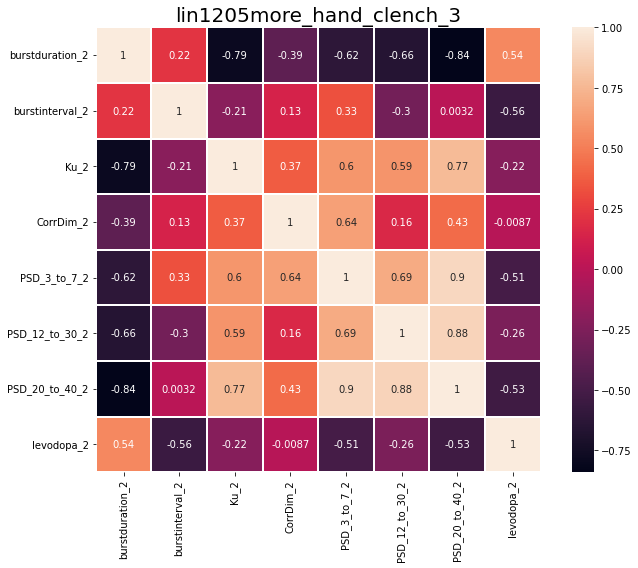

<Figure size 432x288 with 0 Axes>

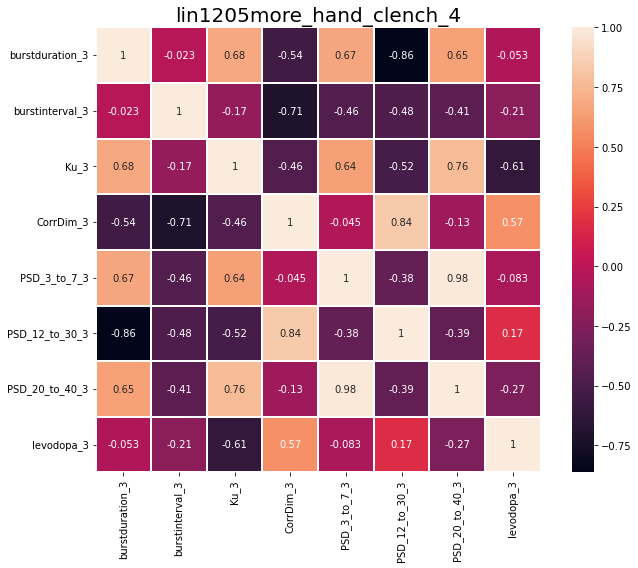

<Figure size 432x288 with 0 Axes>

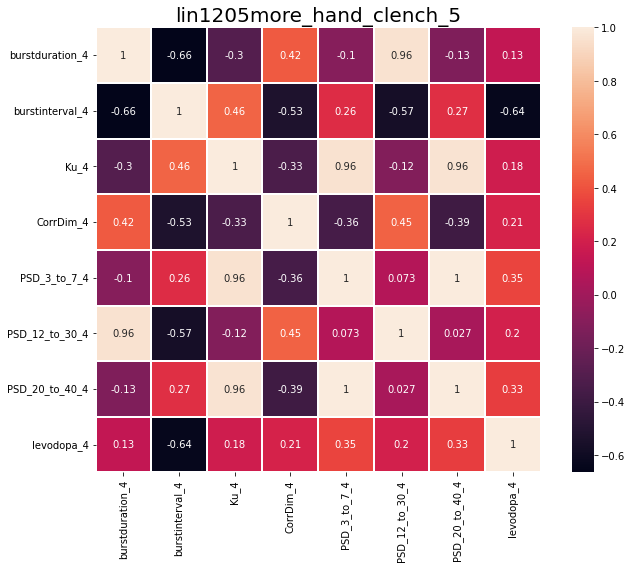

<Figure size 432x288 with 0 Axes>

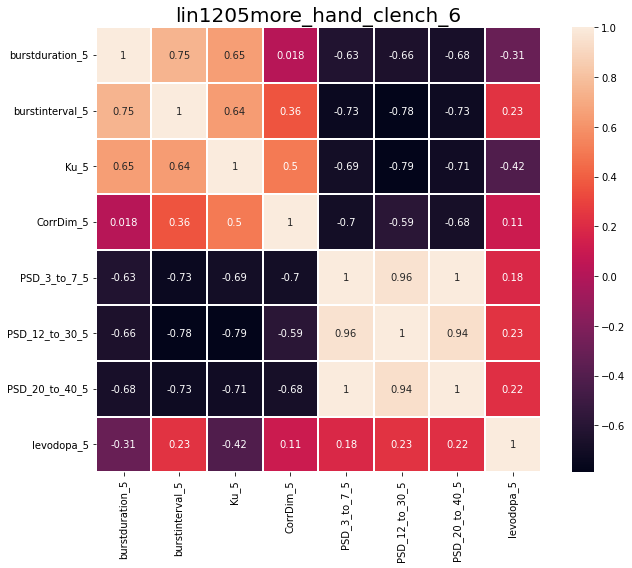

<Figure size 432x288 with 0 Axes>

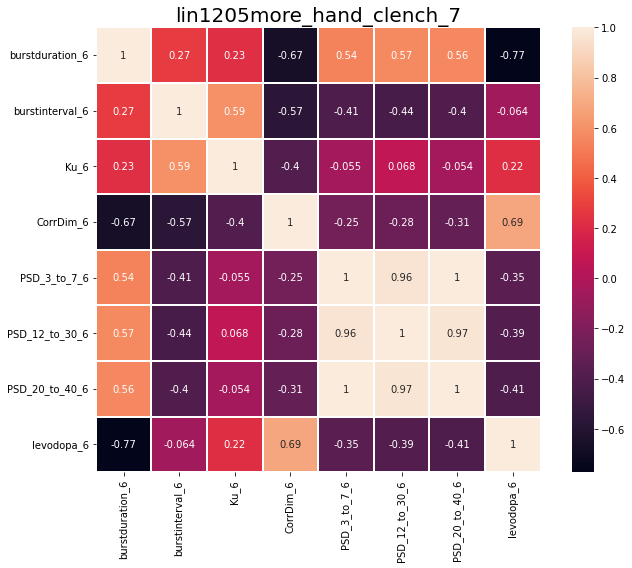

<Figure size 432x288 with 0 Axes>

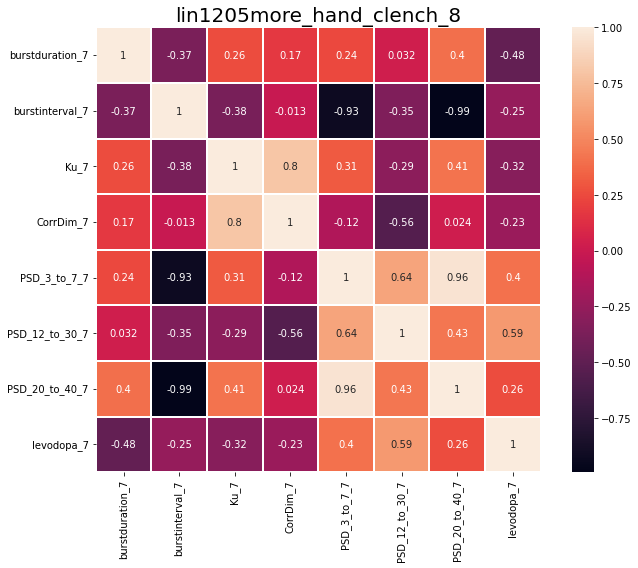

<Figure size 432x288 with 0 Axes>

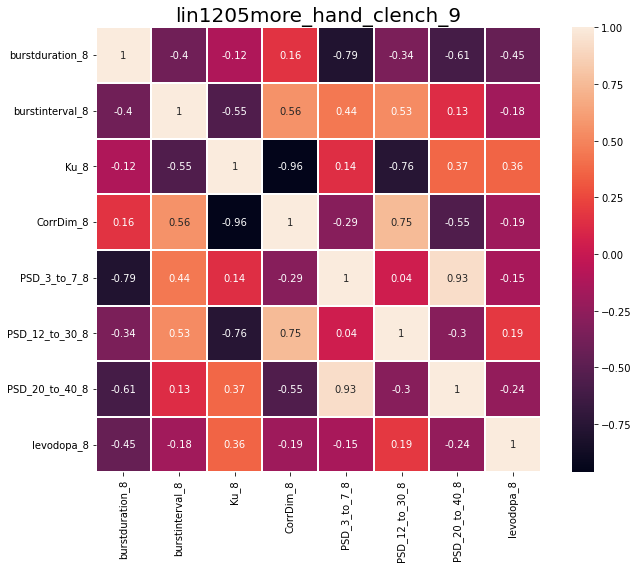

<Figure size 432x288 with 0 Axes>

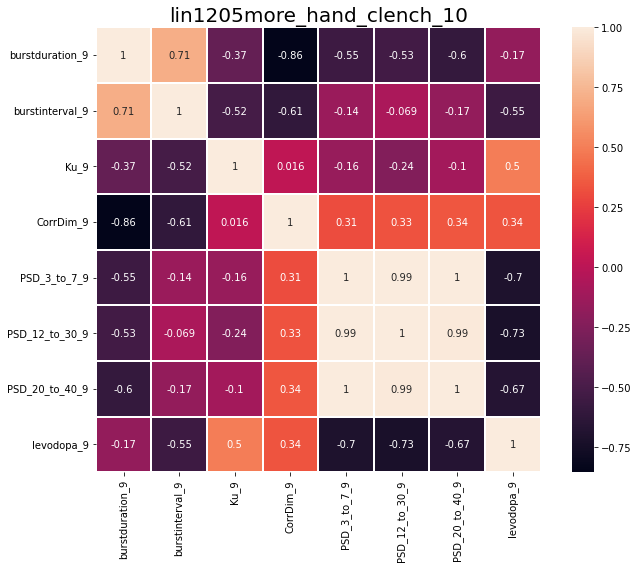

<Figure size 432x288 with 0 Axes>

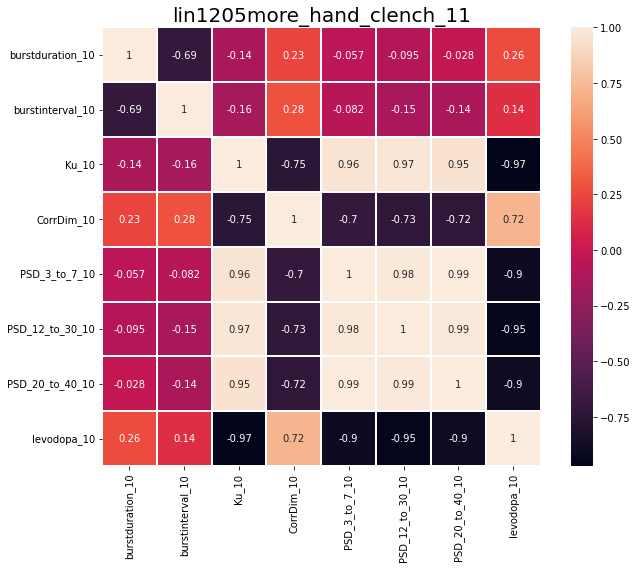

<Figure size 432x288 with 0 Axes>

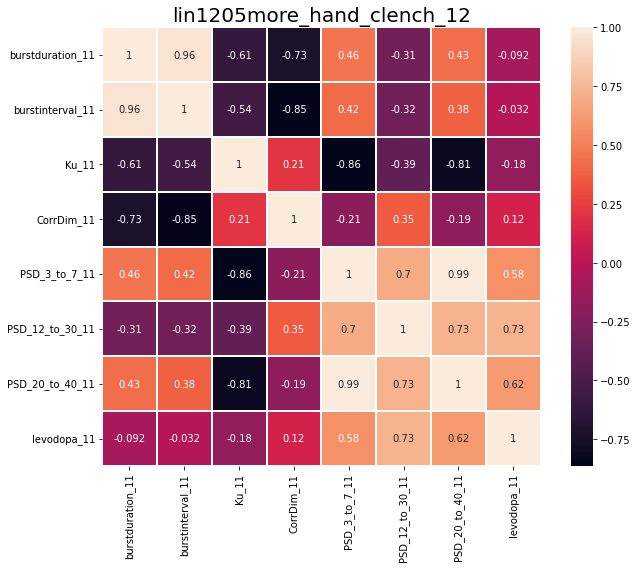

<Figure size 432x288 with 0 Axes>

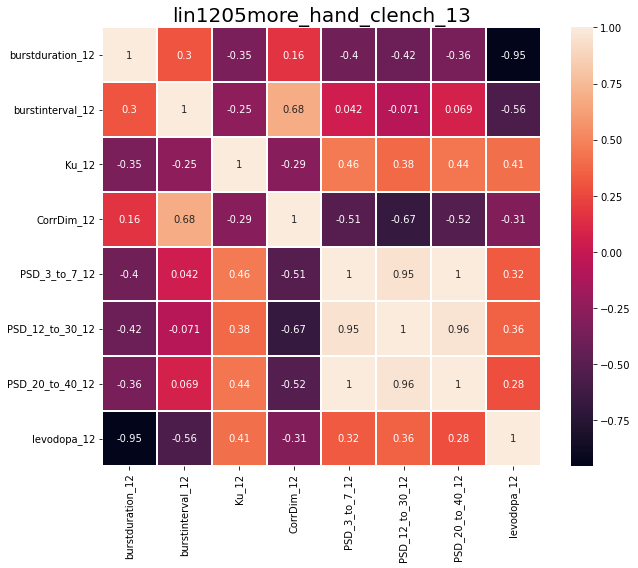

<Figure size 432x288 with 0 Axes>

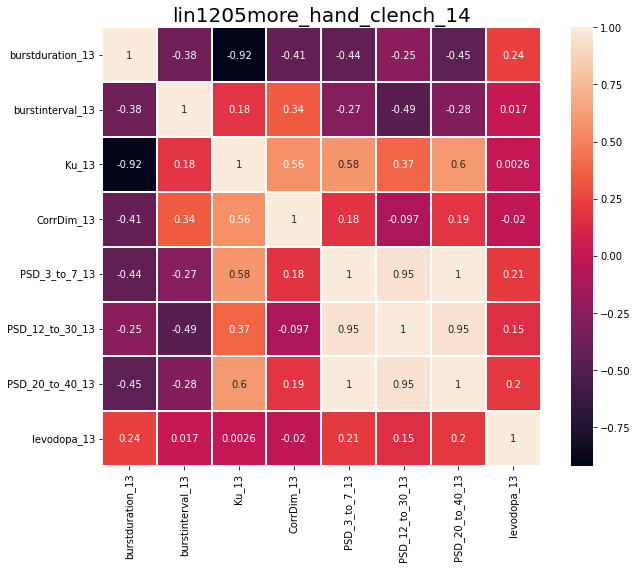

<Figure size 432x288 with 0 Axes>

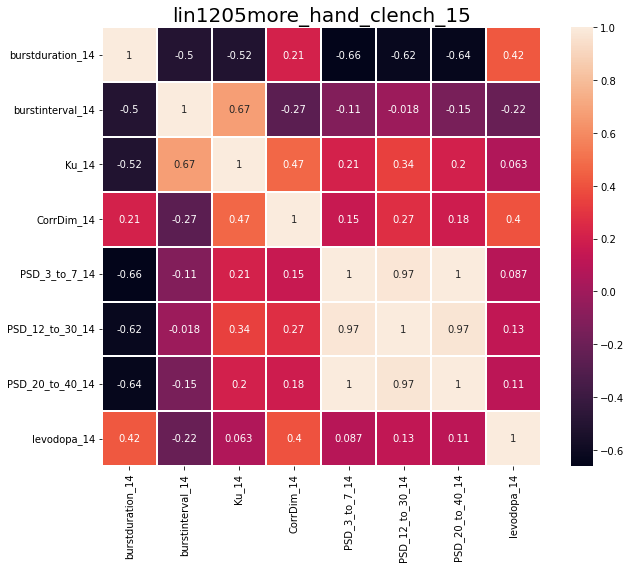

<Figure size 432x288 with 0 Axes>

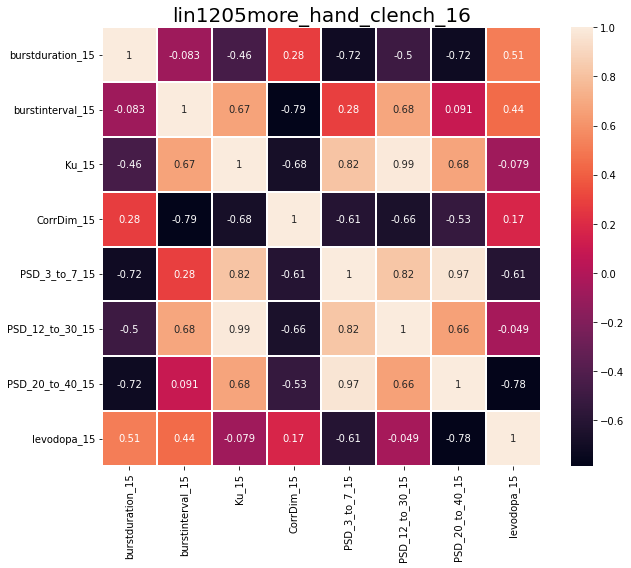

<Figure size 432x288 with 0 Axes>

In [25]:
ch=range(16)
part='hand_clench'
test=[11,34,48,66,88,102]


correlation_matrix(mypath,part,test,ch)

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


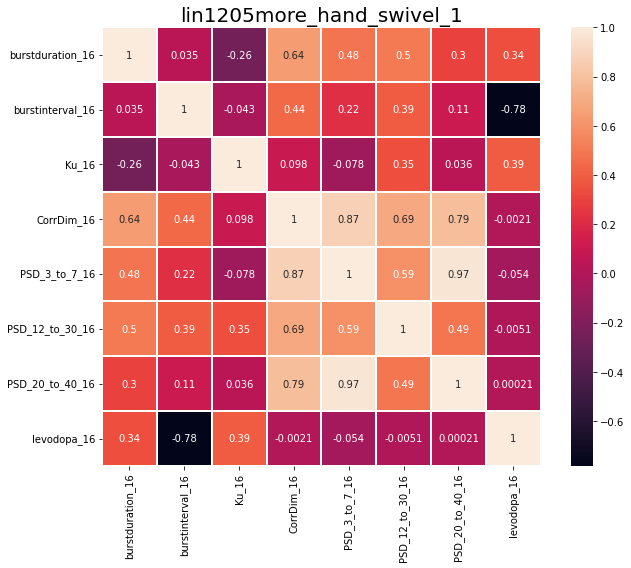

<Figure size 432x288 with 0 Axes>

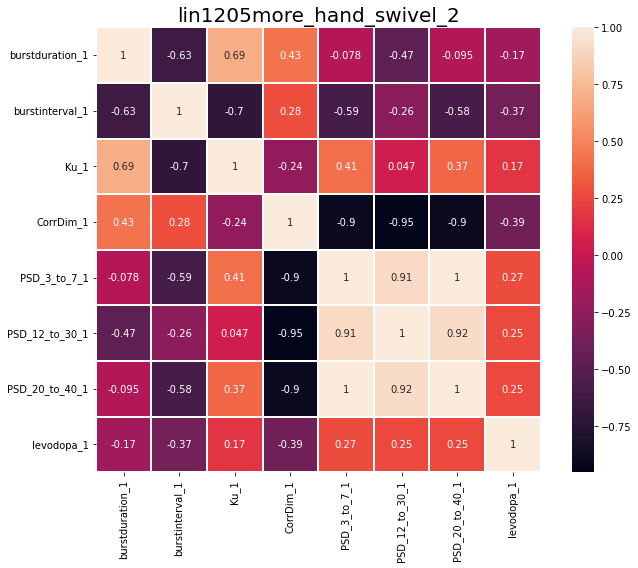

<Figure size 432x288 with 0 Axes>

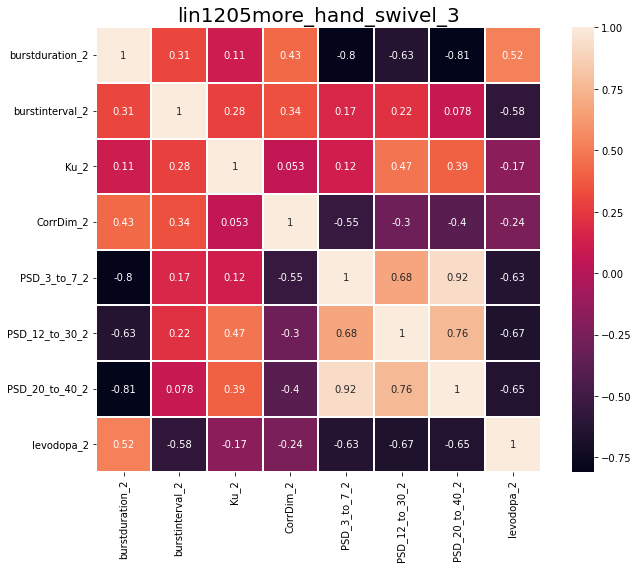

<Figure size 432x288 with 0 Axes>

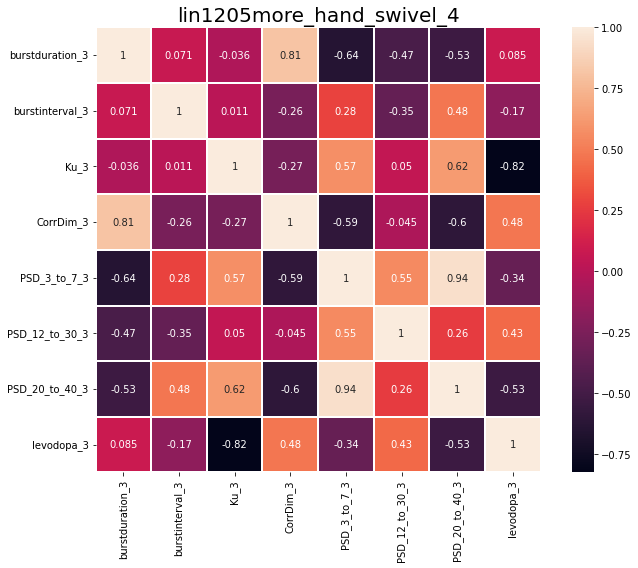

<Figure size 432x288 with 0 Axes>

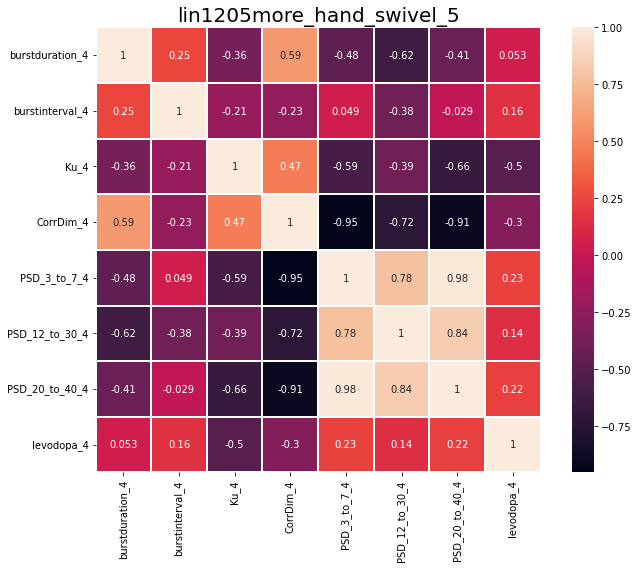

<Figure size 432x288 with 0 Axes>

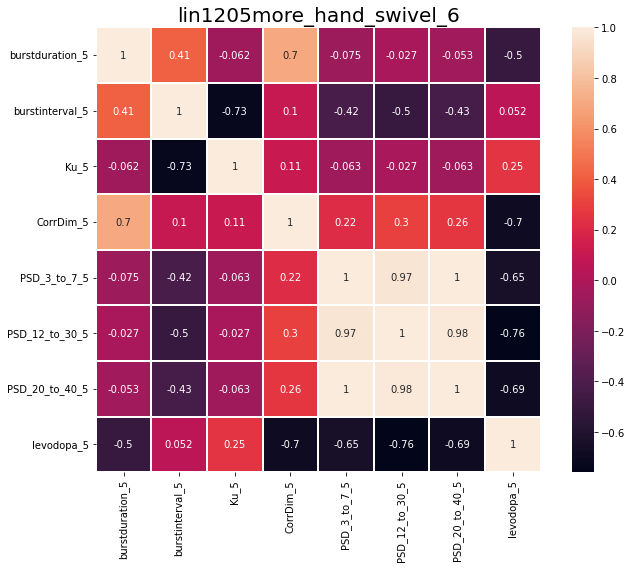

<Figure size 432x288 with 0 Axes>

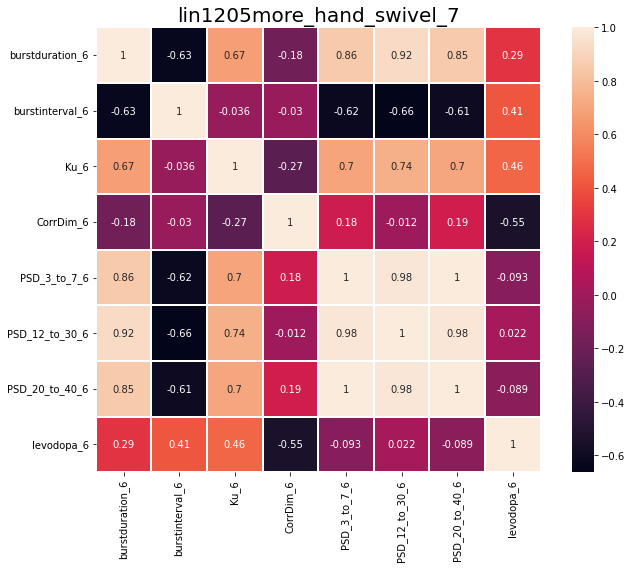

<Figure size 432x288 with 0 Axes>

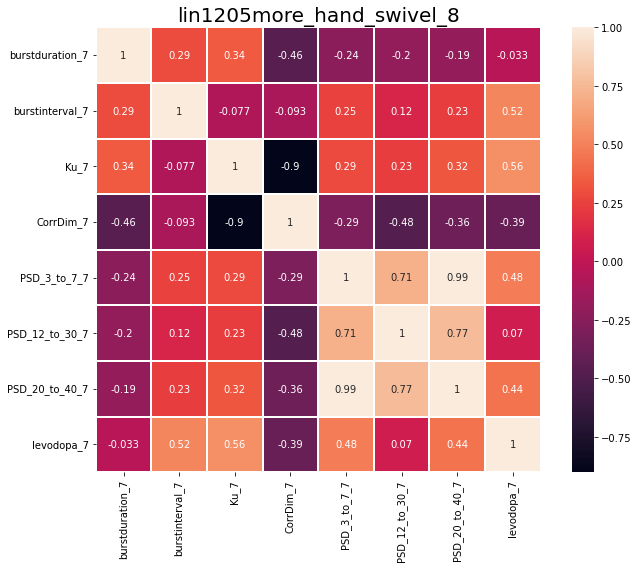

<Figure size 432x288 with 0 Axes>

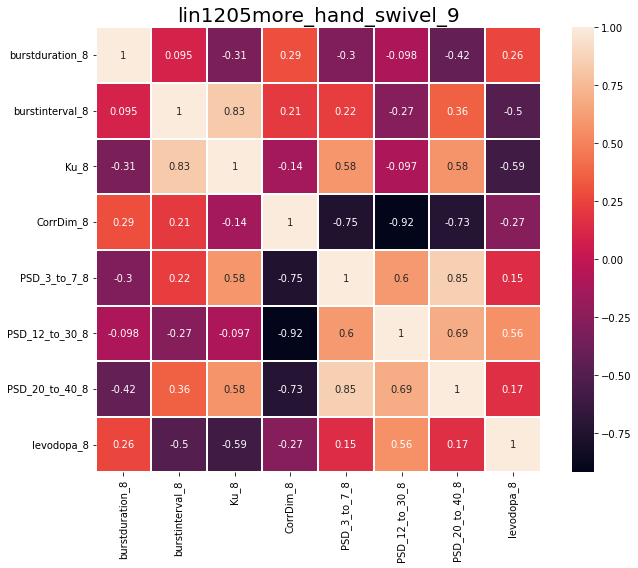

<Figure size 432x288 with 0 Axes>

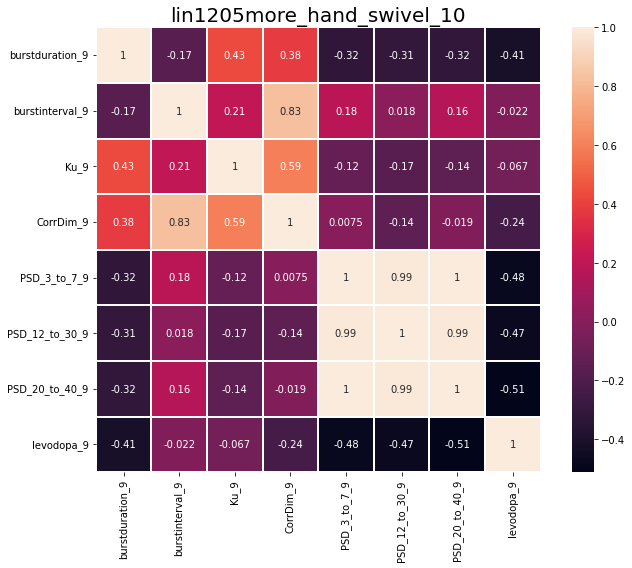

<Figure size 432x288 with 0 Axes>

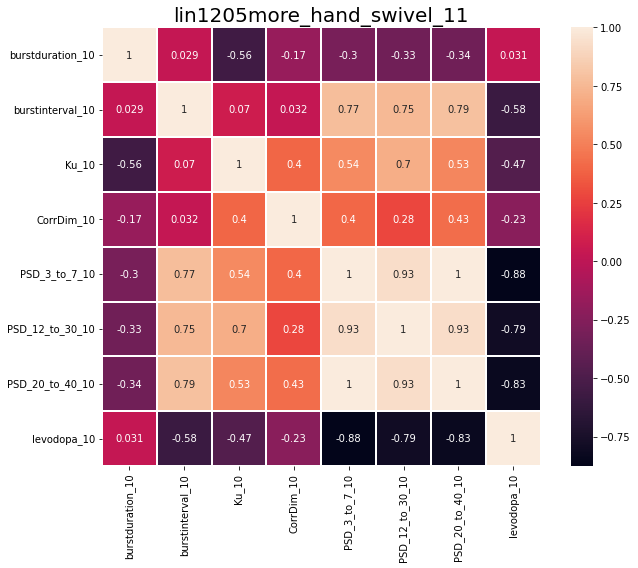

<Figure size 432x288 with 0 Axes>

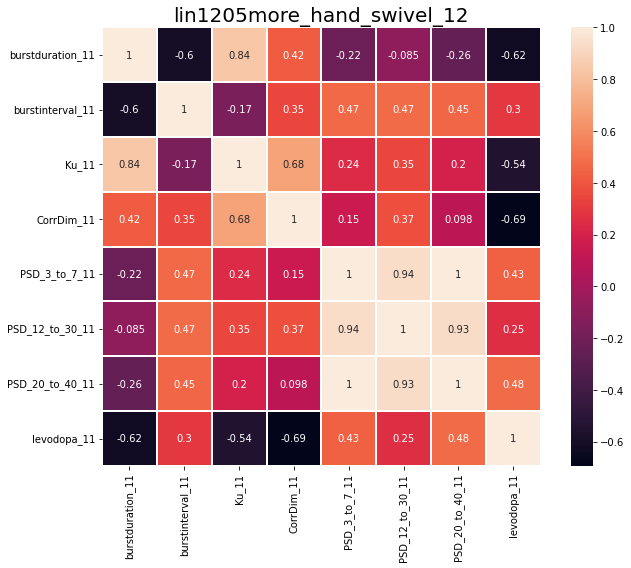

<Figure size 432x288 with 0 Axes>

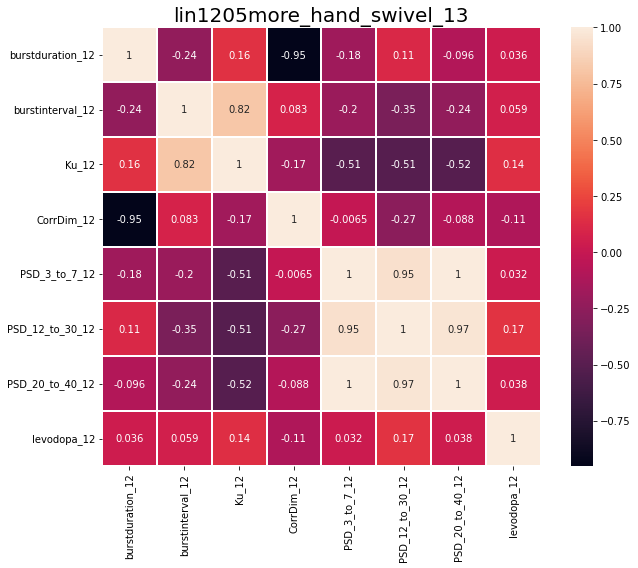

<Figure size 432x288 with 0 Axes>

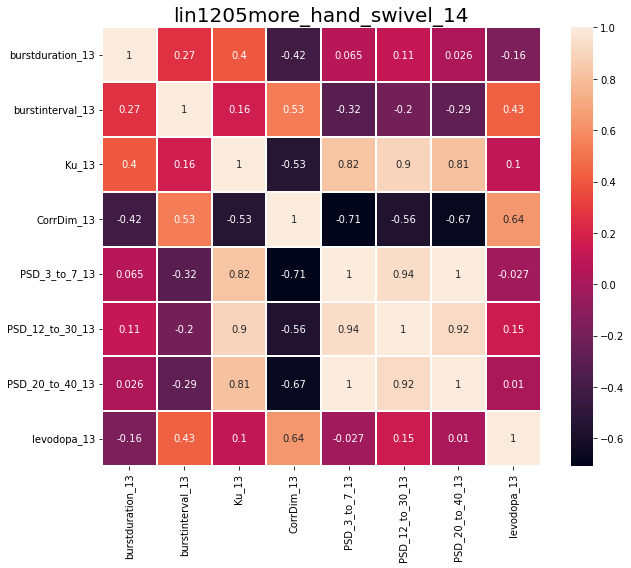

<Figure size 432x288 with 0 Axes>

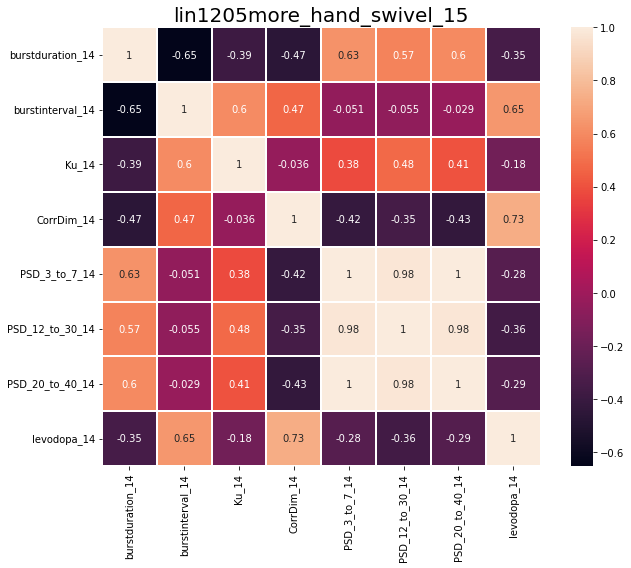

<Figure size 432x288 with 0 Axes>

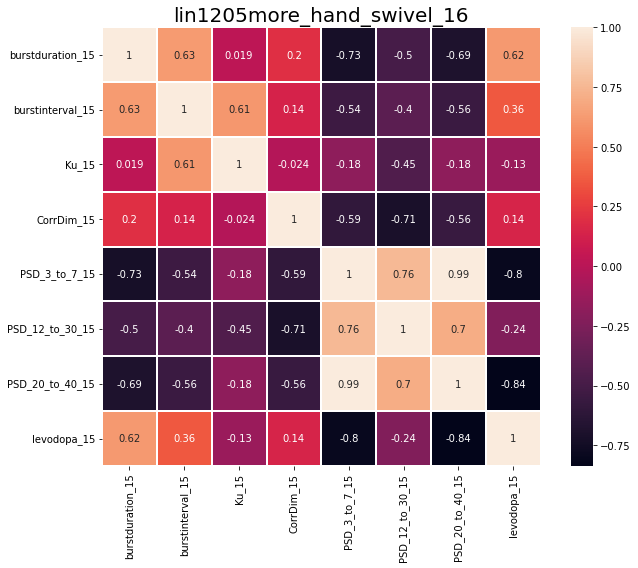

<Figure size 432x288 with 0 Axes>

In [26]:
ch=range(16)
part='hand_swivel'
test=[12,35,49,67,89,103]

correlation_matrix(mypath,part,test,ch)

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


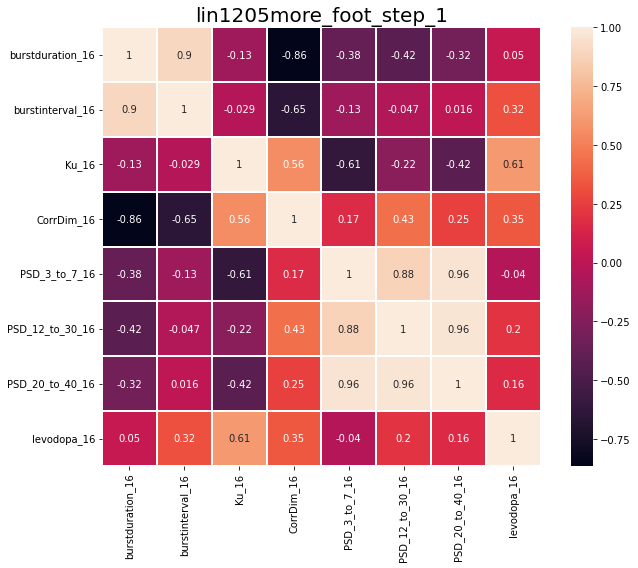

<Figure size 432x288 with 0 Axes>

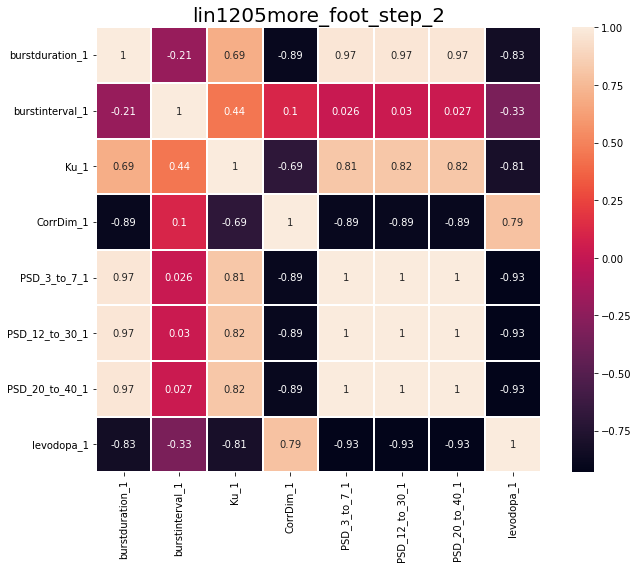

<Figure size 432x288 with 0 Axes>

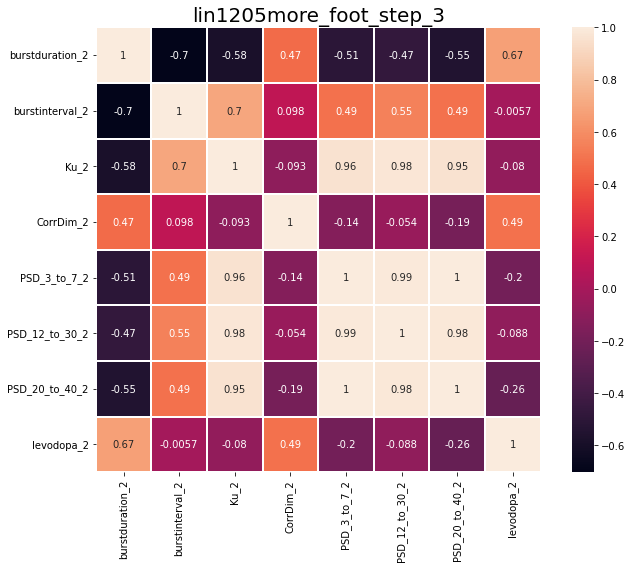

<Figure size 432x288 with 0 Axes>

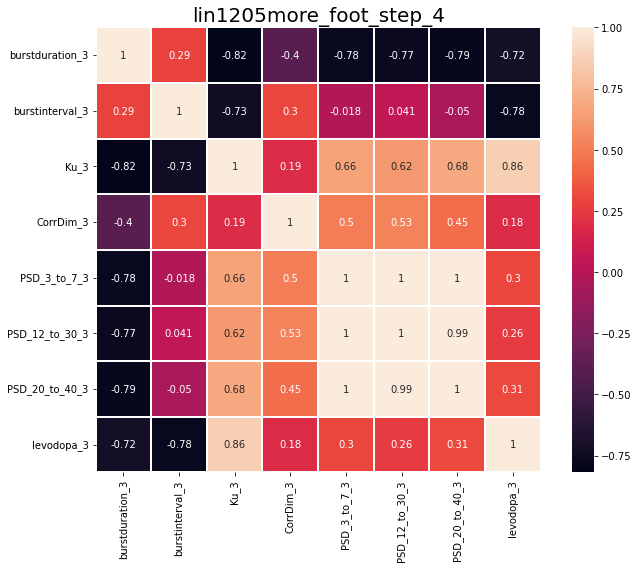

<Figure size 432x288 with 0 Axes>

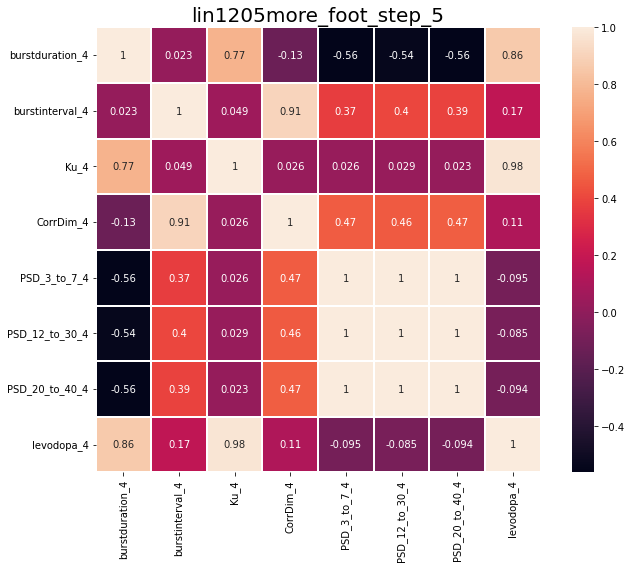

<Figure size 432x288 with 0 Axes>

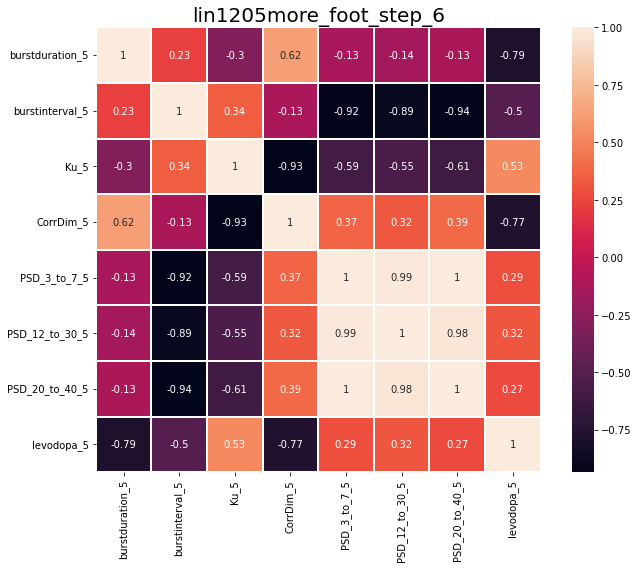

<Figure size 432x288 with 0 Axes>

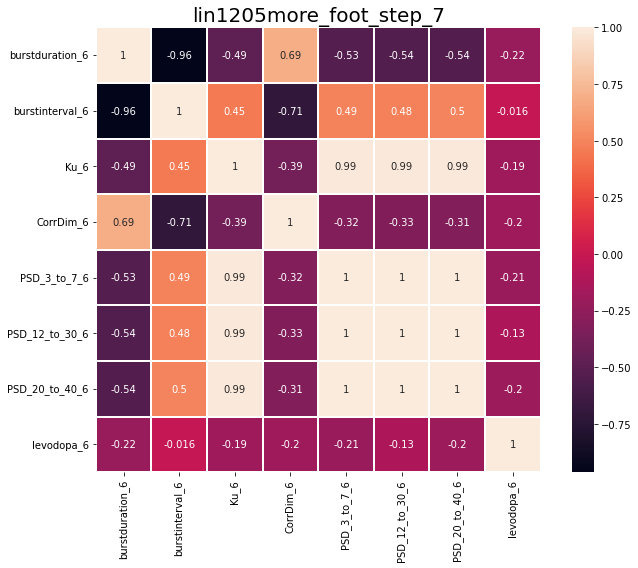

<Figure size 432x288 with 0 Axes>

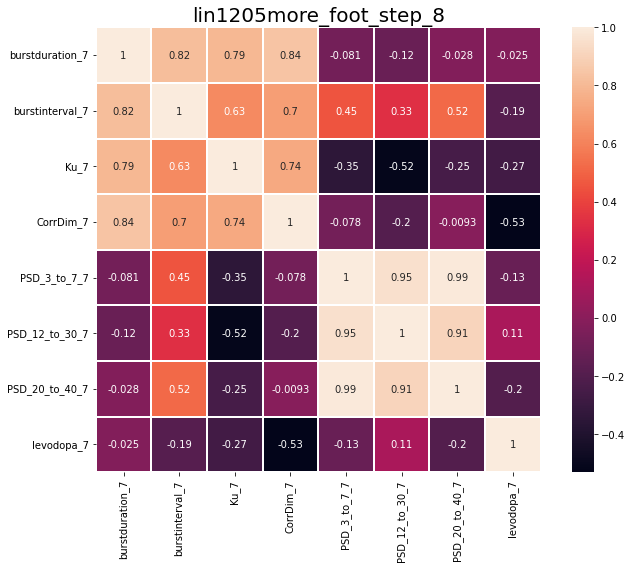

<Figure size 432x288 with 0 Axes>

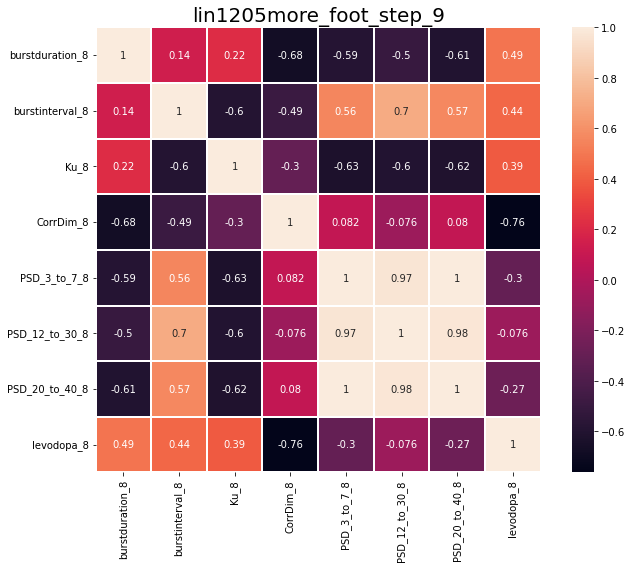

<Figure size 432x288 with 0 Axes>

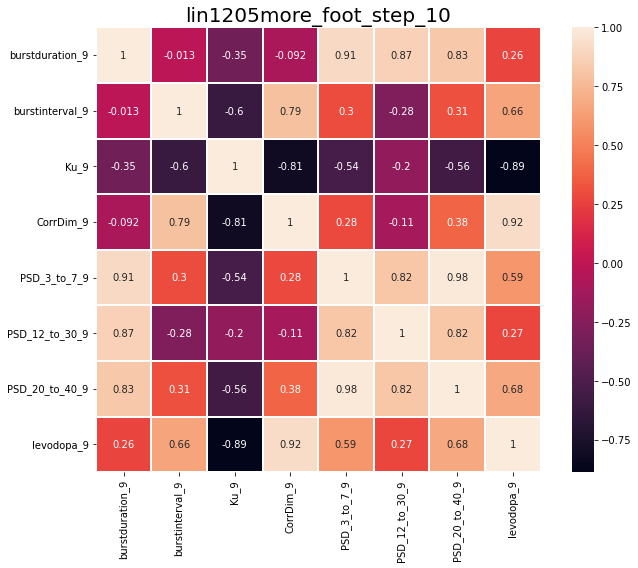

<Figure size 432x288 with 0 Axes>

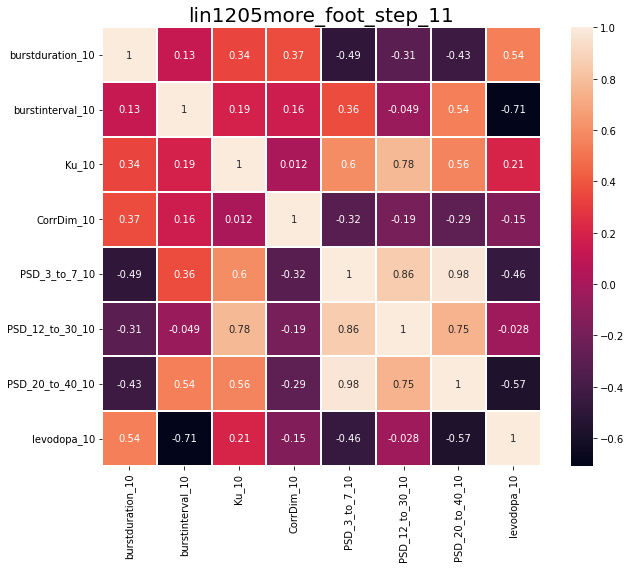

<Figure size 432x288 with 0 Axes>

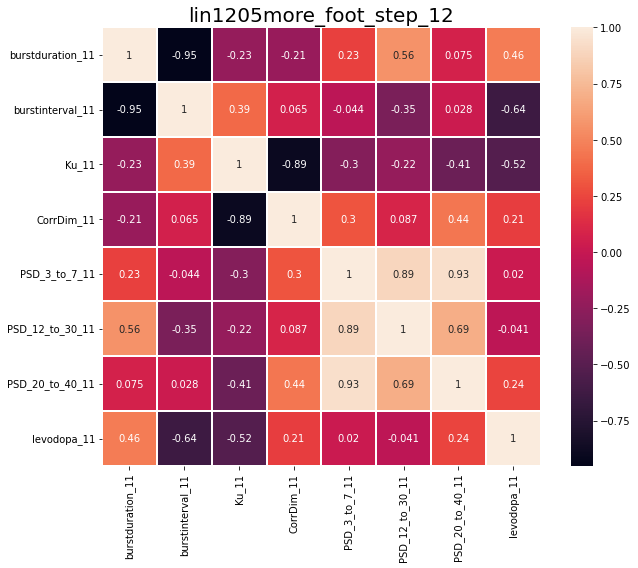

<Figure size 432x288 with 0 Axes>

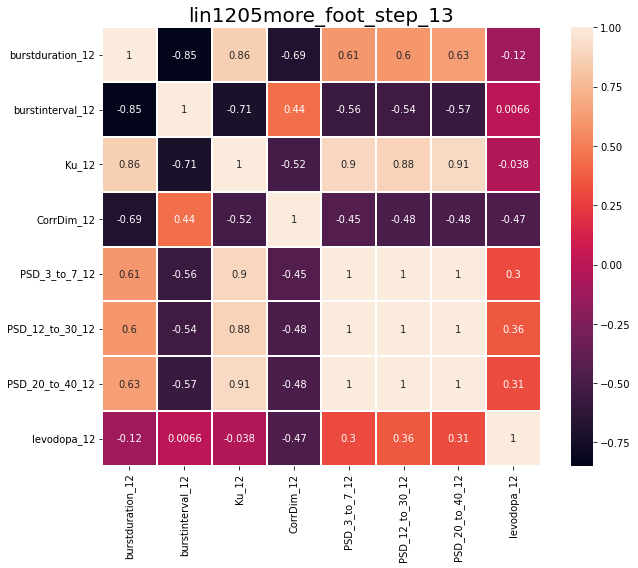

<Figure size 432x288 with 0 Axes>

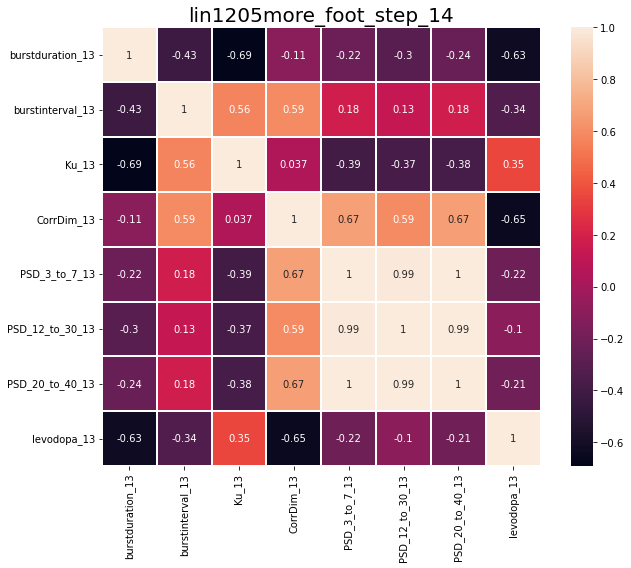

<Figure size 432x288 with 0 Axes>

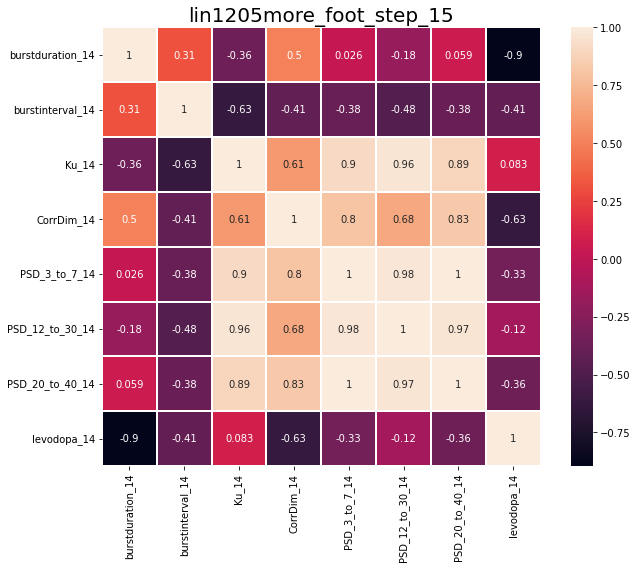

<Figure size 432x288 with 0 Axes>

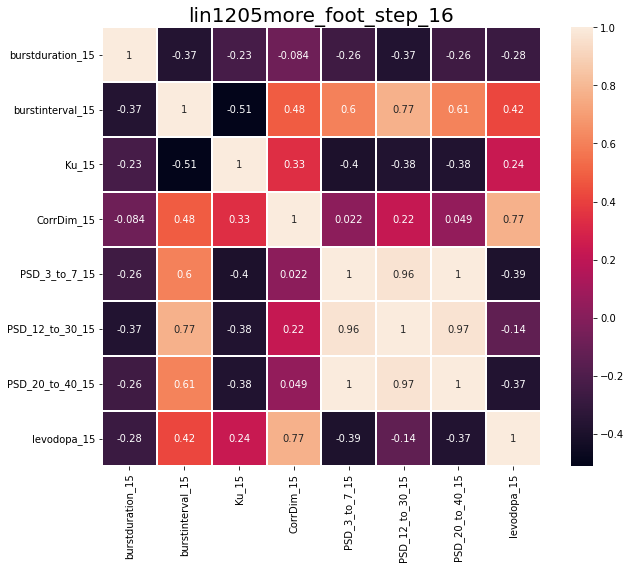

<Figure size 432x288 with 0 Axes>

In [27]:
ch=range(16)
part='foot_step'
test=[13,36,50,68,90,104]


correlation_matrix(mypath,part,test,ch)

C:\Users\huang\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


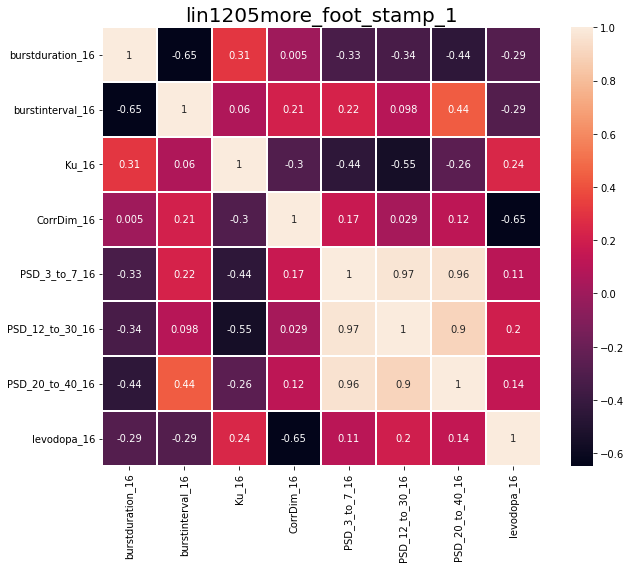

<Figure size 432x288 with 0 Axes>

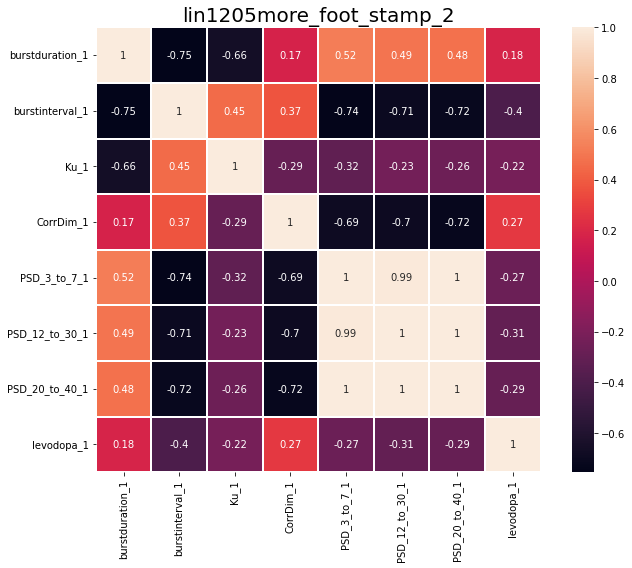

<Figure size 432x288 with 0 Axes>

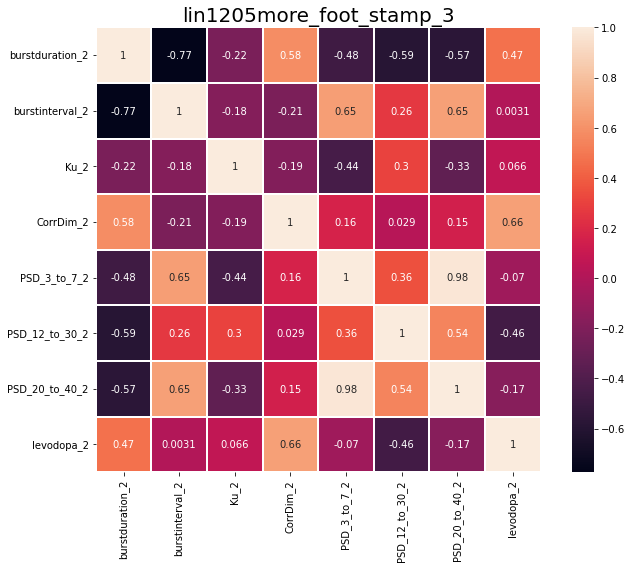

<Figure size 432x288 with 0 Axes>

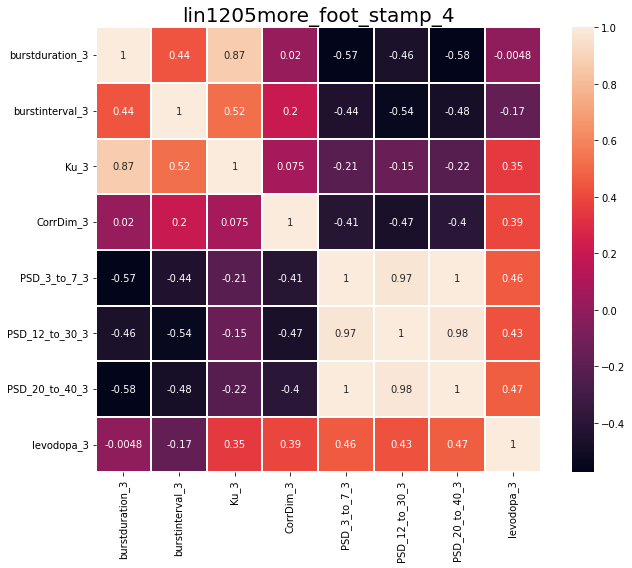

<Figure size 432x288 with 0 Axes>

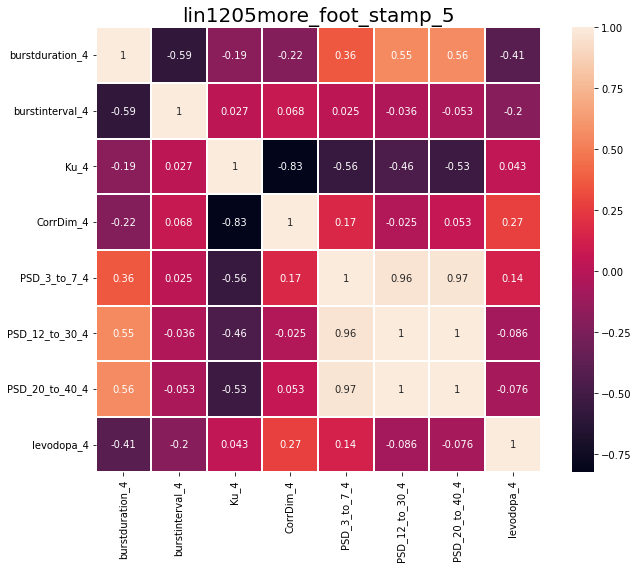

<Figure size 432x288 with 0 Axes>

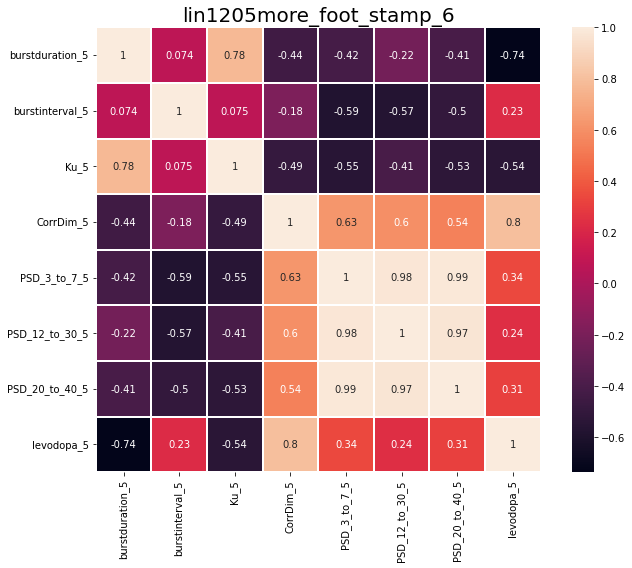

<Figure size 432x288 with 0 Axes>

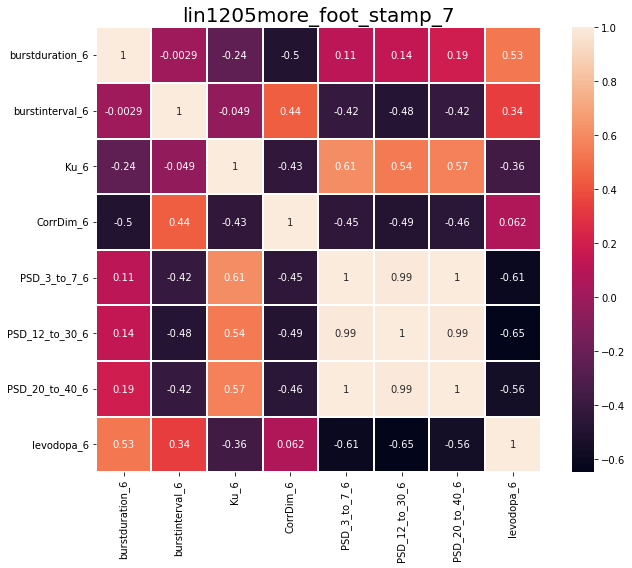

<Figure size 432x288 with 0 Axes>

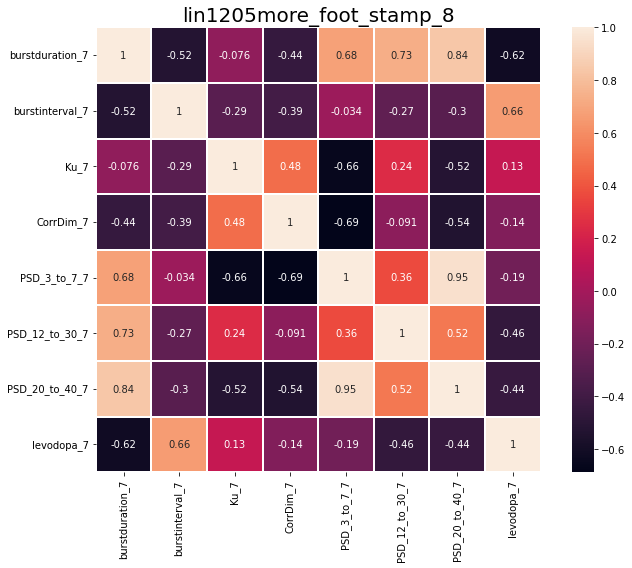

<Figure size 432x288 with 0 Axes>

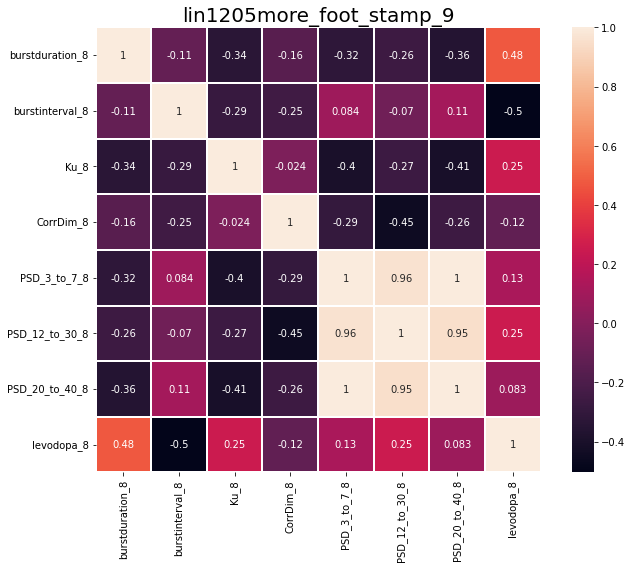

<Figure size 432x288 with 0 Axes>

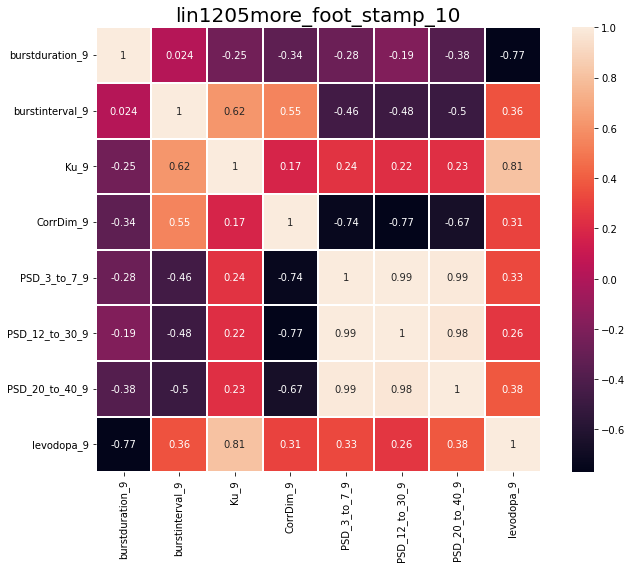

<Figure size 432x288 with 0 Axes>

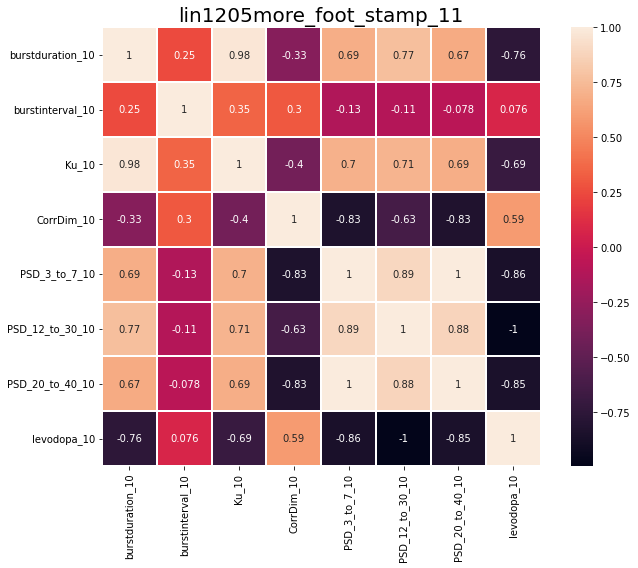

<Figure size 432x288 with 0 Axes>

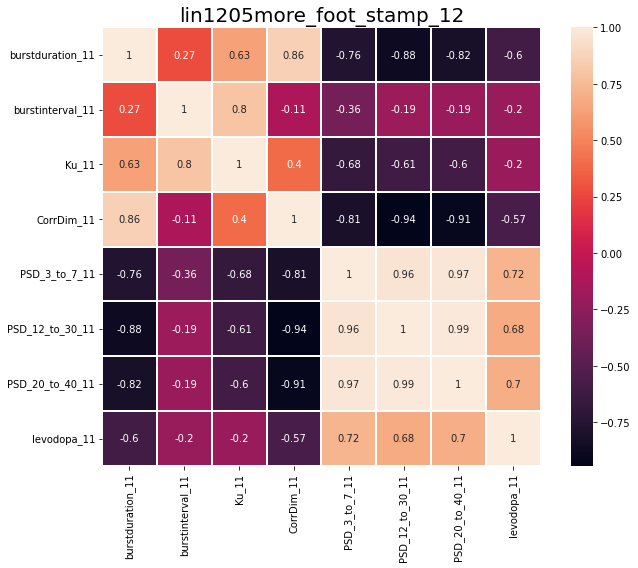

<Figure size 432x288 with 0 Axes>

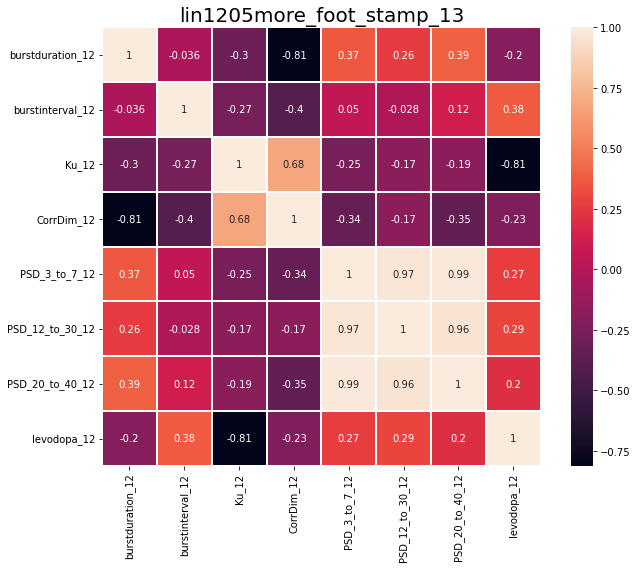

<Figure size 432x288 with 0 Axes>

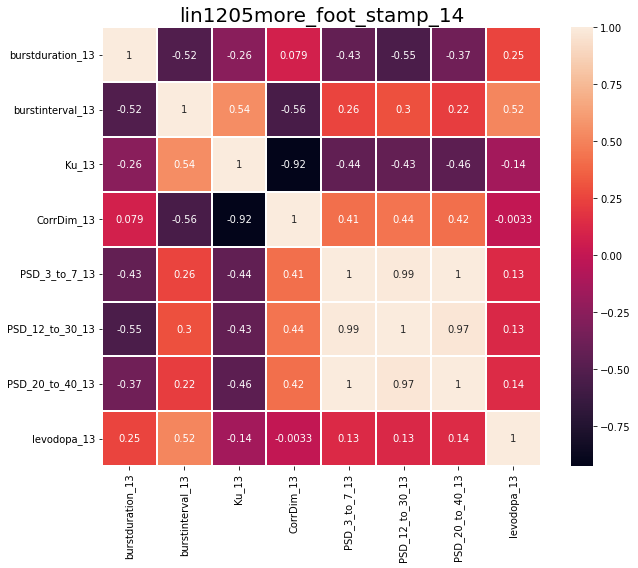

<Figure size 432x288 with 0 Axes>

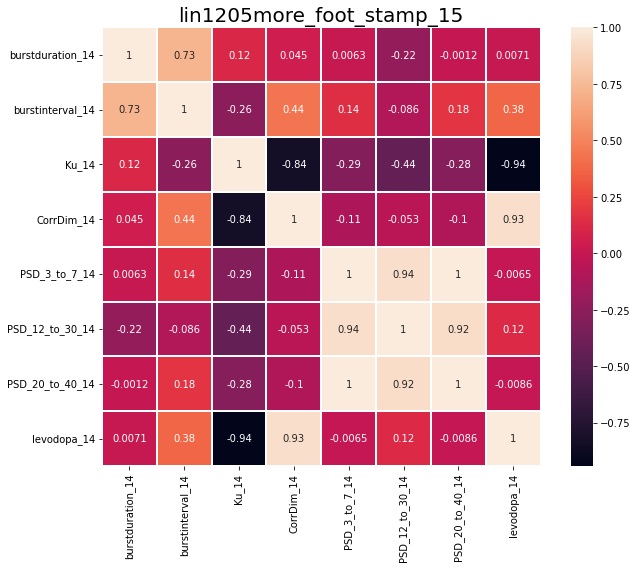

<Figure size 432x288 with 0 Axes>

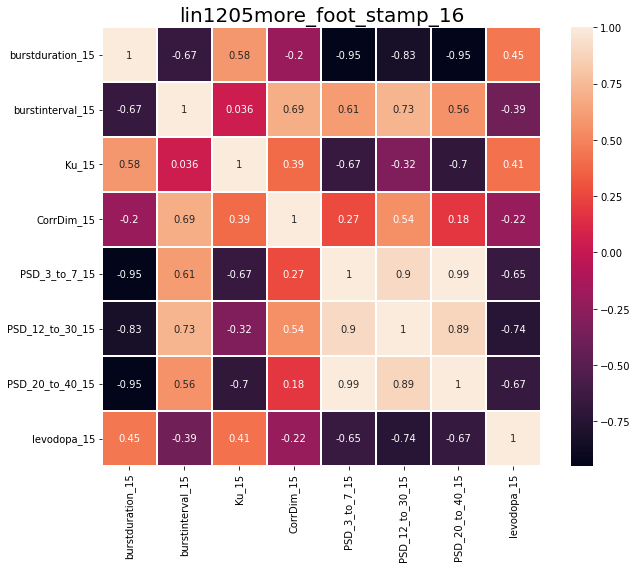

<Figure size 432x288 with 0 Axes>

In [28]:
ch=range(16)
part='foot_stamp'
test=[14,37,51,69,91,105]


correlation_matrix(mypath,part,test,ch)